In [ ]:
# Use the scaling laws (https://arxiv.org/pdf/2001.08361.pdf) to generate the following figure.
# This figure contains the two key information that we need to plan the training schedule: 
# 1) The shape of the learning curves for each model size
# 2) The point at wi

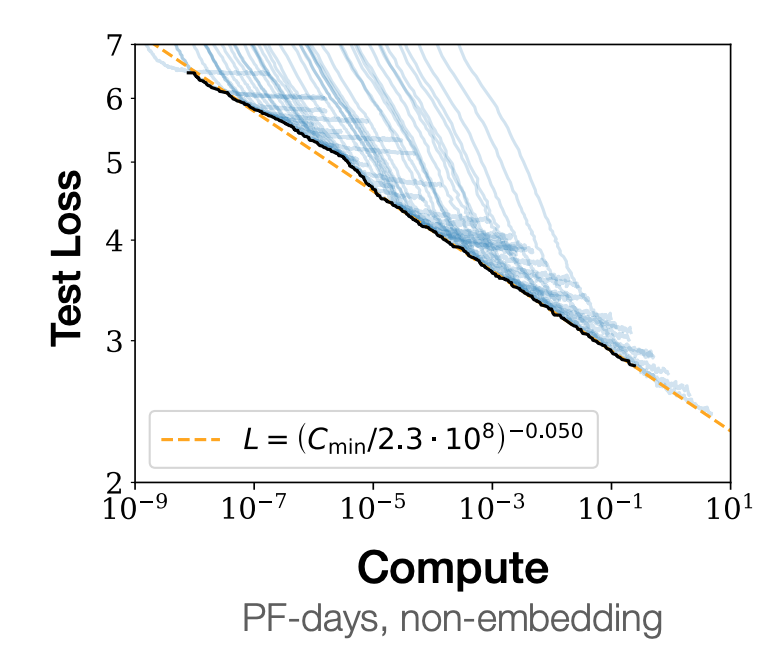

In [1]:


import matplotlib.pyplot as plt
import numpy as np
import math


def L_at_optimal_N(Cmin):  # loss given compute at optimal model size  (figure 13)
    return (2.3 * 10**8 / Cmin)**0.05


def optimal_N(Cmin):  # optimal model size given compute (figure 14 left)
    return 1.3 * 10**9 * Cmin**0.73


def L_at_convergence(N):  # loss at convergence given model size (eq 1.1)
    return (8.8 * 10**13 / N)**0.076 


def L_given_size_and_steps(N, Smin):  # loss give model size and number of steps (eq 1.6)
    return (6.5 * 10**13 / N)**0.077 + (2.1 * 10**3 / Smin)**0.76


def Bcrit_give_L(L): #  critical batch size at a given Loss (eq 5.3)
    return 2 * 10**8 / (L ** (1 / 0.21))


def C_in_PFDay(c):  # Notations section 1.3
    return c / (8.64 * 10**19) 


def C_given_N_B_S(N, B, S):
    return 6 * N * B * S  # after equation 5.5


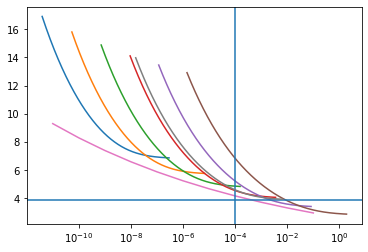

In [12]:
def draw_curve_for_N(N):
    '''Given model size, plot learning curve assuming critical batch size'''

    Smin = range(100, 100000)  # number of training steps
    L_at_N = [L_given_size_and_steps(N, s) for s in Smin]
    Bcrit = [Bcrit_give_L(l) for l in L_at_N ]
    C = [C_given_N_B_S(N, bcrit, 2 * smin) for bcrit, smin in  zip(Bcrit, Smin)]  # S = 2Smin @ Bcrit (eq 5.4)
    C = [C_in_PFDay(c) for c in C]
    plt.plot(C, L_at_N)


# 1) Draw learning curves for different model sizes
for n_power in range(3, 9):
    N = 10**n_power
    draw_curve_for_N(N)


# 2) Draw a line indicating the points where compute inefficient training starts
C = [10**c_power for c_power in range(-11, 0)]    
L = [L_at_optimal_N(c) for c in C]
plt.plot(C, L)


# 3) Given a fixed compute budget Cmin, find the optimal model size and draw its learning curve
Cmin = 10**-4
N = optimal_N(Cmin)  # compute optimal model size
Lmin = L_at_convergence(N)  # compute loss at convergence
plt.axhline(y=Lmin)  # draw horizontal line showing loss at convergence
plt.axvline(x=Cmin)  # draw a vertical line indication the point where compute inefficient training starts
draw_curve_for_N(N)  # plot the whole learning curve


# show plot with log scale for the x-axis
plt.xscale('log')
plt.show()